<a href="https://colab.research.google.com/github/Nurguyan/Ice-Hockey-Match-Outcome-Predictor/blob/main/Ice_Hockey_Match_Outcome_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

url = 'https://raw.githubusercontent.com/Nurguyan/Ice-Hockey-Match-Outcome-Predictor/main/data/data.csv'

df = pd.read_csv(url)
print(df[:2])

         Date Location Team   GF   GA  ...    Sh%    Sv%    PP%    PK%  Class
0  07/09/2018     Home  LON  247  161  ...  36.85  29.08  26.17  82.06   Loss
1  07/09/2018     Away  TER  223  144  ...  40.69  32.31  32.44  84.10    Win

[2 rows x 12 columns]


In [2]:
#we assume that outcome of the match do not depend on its date
df = df.drop(['Date'], axis=1)

#convert categorical data into integers
df = pd.get_dummies(df, columns=['Team'])
df['Location'] = (df['Location'] == 'Home').astype(int)
df['Class'] = (df['Class'] == 'Win').astype(int)

print(df[:5])
df.info()

   Location   GF   GA   GF%  ...  Team_STJ  Team_TER  Team_VAL  Team_WIS
0         1  247  161  5.15  ...         0         0         0         0
1         0  223  144  4.65  ...         0         1         0         0
2         1  202  211  4.21  ...         0         0         0         0
3         0  200  207  4.17  ...         0         0         0         0
4         0  207  151  4.31  ...         1         0         0         0

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  1008 non-null   int64  
 1   GF        1008 non-null   int64  
 2   GA        1008 non-null   int64  
 3   GF%       1008 non-null   float64
 4   GA%       1008 non-null   float64
 5   Sh%       1008 non-null   float64
 6   Sv%       1008 non-null   float64
 7   PP%       1008 non-null   float64
 8   PK%       1008 non-null   float64
 9 

In [3]:
from sklearn.model_selection import train_test_split

X_features = df.drop(['Class'], axis=1)
Y_feature = df['Class']

x_train, x_test, y_train, y_test = train_test_split(X_features, Y_feature, test_size=0.20, random_state=4)
print("Using %d samples for training and %d for validation" % (len(x_train), len(x_test)))

Using 806 samples for training and 202 for validation


In [4]:
from sklearn.preprocessing import MinMaxScaler

#normalize features
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

print(x_train[:5])

   Location        GF        GA  ...  Team_TER  Team_VAL  Team_WIS
0       1.0  0.038760  1.000000  ...       0.0       0.0       1.0
1       1.0  0.139535  0.713415  ...       0.0       0.0       0.0
2       1.0  0.542636  0.164634  ...       1.0       0.0       0.0
3       1.0  0.937984  0.000000  ...       0.0       0.0       0.0
4       1.0  0.139535  0.713415  ...       0.0       0.0       0.0

[5 rows x 20 columns]


In [5]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=300, verbose=1)

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

26/26 [==============================] - 0s 8ms/step - loss: 0.7023 - accuracy: 0.4702 - val_loss: 0.6906 - val_accuracy: 0.5693
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5955 - val_loss: 0.6776 - val_accuracy: 0.5941
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6154 - val_loss: 0.6691 - val_accuracy: 0.5891
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6658 - acc

Text(0.5, 0, 'Epochs')

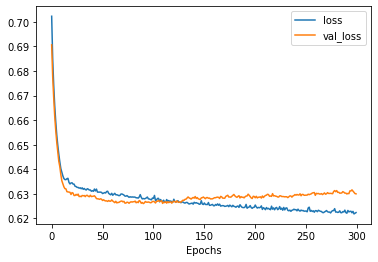

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', score)

test loss, test acc: [0.6299867630004883, 0.6435643434524536]


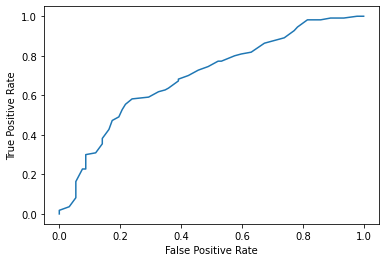

ROC AUC=0.696


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:]

# calculate roc curves
FPR, TPR, _ = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot(FPR, TPR)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the plot
pyplot.show()

# calculate scores
auc = roc_auc_score(y_test, probs)
print('ROC AUC=%.3f' % (auc))